In [1]:
import pandas as pd

# Load all CSV files
city_df = pd.read_csv("C:/Users/K L narasaiah/Desktop/My_tourism project/City.csv")
continent_df = pd.read_csv("C:/Users/K L narasaiah/Desktop/My_tourism project/Continent.csv")
country_df = pd.read_csv("C:/Users/K L narasaiah/Desktop/My_tourism project/Country.csv")
item_df = pd.read_csv("C:/Users/K L narasaiah/Desktop/My_tourism project/Item.csv")
mode_df = pd.read_csv("C:/Users/K L narasaiah/Desktop/My_tourism project/Mode.csv")
region_df = pd.read_csv("C:/Users/K L narasaiah/Desktop/My_tourism project/Region.csv")
transaction_df = pd.read_csv("C:/Users/K L narasaiah/Desktop/My_tourism project/Transaction.csv")
type_df = pd.read_csv("C:/Users/K L narasaiah/Desktop/My_tourism project/Type.csv")
user_df = pd.read_csv("C:/Users/K L narasaiah/Desktop/My_tourism project/User.csv")

# Clean placeholder values
city_df = city_df[city_df['CityName'] != '-']
continent_df = continent_df[continent_df['Contenent'] != '-']
country_df = country_df[country_df['Country'] != '-']
region_df = region_df[region_df['Region'] != '-']
mode_df = mode_df[mode_df['VisitMode'] != '-']
type_df = type_df[type_df['AttractionType'] != '-']



In [2]:
# Rename ContentId to match across tables
region_df.rename(columns={'ContentId': 'ContenentId'}, inplace=True)

In [3]:
# Step 1: Merge transaction with attraction/item
merged_df = transaction_df.merge(item_df, on='AttractionId', how='left')

In [4]:
merged_df.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia"
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia"
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia"
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia"
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia"


In [5]:
# Step 2: Merge with attraction type
merged_df = merged_df.merge(type_df, on='AttractionTypeId', how='left')

In [6]:
merged_df.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas


In [7]:
# Step 3: Merge with visit mode
merged_df = merged_df.merge(mode_df, left_on='VisitMode', right_on='VisitModeId', how='left')

In [8]:
merged_df.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode_x,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitModeId,VisitMode_y
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,Couples
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,4,Friends
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,Family
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,Family
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,Couples


In [9]:
#removing the duplicate column and renaming the original column
merged_df.drop(columns=["VisitMode_x", "VisitMode_y"], inplace=True)  # Keep only one RegionId
merged_df.rename(columns={"VisitModeId": "VisitModeId"}, inplace=True)  # Rename for clarity

In [10]:
merged_df.head()

,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitModeId
0,3,70456,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2
1,8,7567,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,4
2,9,79069,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3
3,10,31019,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3
4,15,43611,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2


In [11]:
#step 4: merging the user data
user_df_trimmed = user_df.drop(columns=['CityId', 'CountryId'], errors='ignore')
merged_df = merged_df.merge(user_df_trimmed, on='UserId', how='left')

In [12]:
merged_df.head()

,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitModeId,ContenentId,RegionId
0,3,70456,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,5,21
1,8,7567,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,4,2,8
2,9,79069,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,2,9
3,10,31019,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,5,17
4,15,43611,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,5,21


In [13]:
#removing the duplicate column and renaming the original column
#merged_df.drop(columns=["ContenentId_y", "RegionId_y"], inplace=True)  # Keep only one RegionId
#merged_df.rename(columns={"ContenentId_x": "ContenentId", "RegionId_x" : "RegionId"}, inplace=True)

In [14]:
merged_df.head()

,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitModeId,ContenentId,RegionId
0,3,70456,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,5,21
1,8,7567,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,4,2,8
2,9,79069,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,2,9
3,10,31019,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,5,17
4,15,43611,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,5,21


In [15]:
# Step 5: Merge with destination city using AttractionCityId
merged_df = merged_df.merge(city_df, left_on='AttractionCityId', right_on='CityId', how='left')

In [16]:
merged_df.head()

,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitModeId,ContenentId,RegionId,CityId,CityName,CountryId
0,3,70456,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,5,21,1,Douala,1
1,8,7567,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,4,2,8,1,Douala,1
2,9,79069,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,2,9,1,Douala,1
3,10,31019,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,5,17,1,Douala,1
4,15,43611,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,5,21,1,Douala,1


In [17]:
#step 6: Merge with country (destination)
merged_df = merged_df.merge(country_df, on='CountryId', how='left')

In [18]:
merged_df.head()

,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitModeId,ContenentId,RegionId_x,CityId,CityName,CountryId,Country,RegionId_y
0,3,70456,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,5,21,1,Douala,1,Cameroon,1
1,8,7567,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,4,2,8,1,Douala,1,Cameroon,1
2,9,79069,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,2,9,1,Douala,1,Cameroon,1
3,10,31019,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,5,17,1,Douala,1,Cameroon,1
4,15,43611,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,5,21,1,Douala,1,Cameroon,1


In [19]:
merged_df.drop(columns=["RegionId_y"], inplace=True)
merged_df.rename(columns={"RegionId_x" : "RegionId"}, inplace=True)

In [20]:
#step 7: Merge with region
merged_df = merged_df.merge(region_df, on='RegionId', how='left')

In [21]:
merged_df.head()

,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitModeId,ContenentId_x,RegionId,CityId,CityName,CountryId,Country,Region,ContenentId_y
0,3,70456,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,5,21,1,Douala,1,Cameroon,Western Europe,5.0
1,8,7567,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,4,2,8,1,Douala,1,Cameroon,Northern America,2.0
2,9,79069,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,2,9,1,Douala,1,Cameroon,South America,2.0
3,10,31019,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,5,17,1,Douala,1,Cameroon,Central Europe,5.0
4,15,43611,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,5,21,1,Douala,1,Cameroon,Western Europe,5.0


In [22]:
merged_df.drop(columns=["ContenentId_y"], inplace=True)
merged_df.rename(columns={"ContenentId_x" : "ContenentId"}, inplace=True)

In [23]:
merged_df.head()

,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitModeId,ContenentId,RegionId,CityId,CityName,CountryId,Country,Region
0,3,70456,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,5,21,1,Douala,1,Cameroon,Western Europe
1,8,7567,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,4,2,8,1,Douala,1,Cameroon,Northern America
2,9,79069,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,2,9,1,Douala,1,Cameroon,South America
3,10,31019,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,5,17,1,Douala,1,Cameroon,Central Europe
4,15,43611,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,5,21,1,Douala,1,Cameroon,Western Europe


In [24]:
# step 8: Merge with continent
merged_df = merged_df.merge(continent_df, on='ContenentId', how='left')

In [25]:
merged_df.head()

,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitModeId,ContenentId,RegionId,CityId,CityName,CountryId,Country,Region,Contenent
0,3,70456,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,5,21,1,Douala,1,Cameroon,Western Europe,Europe
1,8,7567,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,4,2,8,1,Douala,1,Cameroon,Northern America,America
2,9,79069,2022,10,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,2,9,1,Douala,1,Cameroon,South America,America
3,10,31019,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,5,17,1,Douala,1,Cameroon,Central Europe,Europe
4,15,43611,2022,10,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,5,21,1,Douala,1,Cameroon,Western Europe,Europe


In [26]:
merged_df.dtypes

TransactionId         int64
UserId                int64
VisitYear             int64
VisitMonth            int64
AttractionId          int64
Rating                int64
AttractionCityId      int64
AttractionTypeId      int64
Attraction           object
AttractionAddress    object
AttractionType       object
VisitModeId           int64
ContenentId           int64
RegionId              int64
CityId                int64
CityName             object
CountryId             int64
Country              object
Region               object
Contenent            object
dtype: object

In [27]:
#checking for the null values
merged_df.isnull().sum()

TransactionId         0
UserId                0
VisitYear             0
VisitMonth            0
AttractionId          0
Rating                0
AttractionCityId      0
AttractionTypeId      0
Attraction            0
AttractionAddress     0
AttractionType        0
VisitModeId           0
ContenentId           0
RegionId              0
CityId                0
CityName              0
CountryId             0
Country               0
Region               32
Contenent             0
dtype: int64

In [28]:
#dropping the null values
merged_df.dropna(inplace = True)

In [29]:
merged_df.isnull().sum()

TransactionId        0
UserId               0
VisitYear            0
VisitMonth           0
AttractionId         0
Rating               0
AttractionCityId     0
AttractionTypeId     0
Attraction           0
AttractionAddress    0
AttractionType       0
VisitModeId          0
ContenentId          0
RegionId             0
CityId               0
CityName             0
CountryId            0
Country              0
Region               0
Contenent            0
dtype: int64

In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52898 entries, 0 to 52929
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TransactionId      52898 non-null  int64 
 1   UserId             52898 non-null  int64 
 2   VisitYear          52898 non-null  int64 
 3   VisitMonth         52898 non-null  int64 
 4   AttractionId       52898 non-null  int64 
 5   Rating             52898 non-null  int64 
 6   AttractionCityId   52898 non-null  int64 
 7   AttractionTypeId   52898 non-null  int64 
 8   Attraction         52898 non-null  object
 9   AttractionAddress  52898 non-null  object
 10  AttractionType     52898 non-null  object
 11  VisitModeId        52898 non-null  int64 
 12  ContenentId        52898 non-null  int64 
 13  RegionId           52898 non-null  int64 
 14  CityId             52898 non-null  int64 
 15  CityName           52898 non-null  object
 16  CountryId          52898 non-null  int64 
 17

In [31]:
merged_df = merged_df.drop(columns = ['Attraction', 'AttractionAddress', 'AttractionType'])

In [32]:
merged_df.head()

,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,AttractionCityId,AttractionTypeId,VisitModeId,ContenentId,RegionId,CityId,CityName,CountryId,Country,Region,Contenent
0,3,70456,2022,10,640,5,1,63,2,5,21,1,Douala,1,Cameroon,Western Europe,Europe
1,8,7567,2022,10,640,5,1,63,4,2,8,1,Douala,1,Cameroon,Northern America,America
2,9,79069,2022,10,640,5,1,63,3,2,9,1,Douala,1,Cameroon,South America,America
3,10,31019,2022,10,640,3,1,63,3,5,17,1,Douala,1,Cameroon,Central Europe,Europe
4,15,43611,2022,10,640,3,1,63,2,5,21,1,Douala,1,Cameroon,Western Europe,Europe


In [33]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52898 entries, 0 to 52929
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TransactionId     52898 non-null  int64 
 1   UserId            52898 non-null  int64 
 2   VisitYear         52898 non-null  int64 
 3   VisitMonth        52898 non-null  int64 
 4   AttractionId      52898 non-null  int64 
 5   Rating            52898 non-null  int64 
 6   AttractionCityId  52898 non-null  int64 
 7   AttractionTypeId  52898 non-null  int64 
 8   VisitModeId       52898 non-null  int64 
 9   ContenentId       52898 non-null  int64 
 10  RegionId          52898 non-null  int64 
 11  CityId            52898 non-null  int64 
 12  CityName          52898 non-null  object
 13  CountryId         52898 non-null  int64 
 14  Country           52898 non-null  object
 15  Region            52898 non-null  object
 16  Contenent         52898 non-null  object
dtypes: int64(13), obj

In [34]:
#using the label encoding to change datatype from object to int

from sklearn.preprocessing import LabelEncoder

# Columns to encode
cat_cols = ['CityName', 'Country', 'Region', 'Contenent']

# Initialize label encoder
le = LabelEncoder()

# Apply to each column
for col in cat_cols:
    merged_df[col] = le.fit_transform(merged_df[col])

In [35]:
merged_df.head()

,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,AttractionCityId,AttractionTypeId,VisitModeId,ContenentId,RegionId,CityId,CityName,CountryId,Country,Region,Contenent
0,3,70456,2022,10,640,5,1,63,2,5,21,1,0,1,0,20,4
1,8,7567,2022,10,640,5,1,63,4,2,8,1,0,1,0,11,1
2,9,79069,2022,10,640,5,1,63,3,2,9,1,0,1,0,14,1
3,10,31019,2022,10,640,3,1,63,3,5,17,1,0,1,0,5,4
4,15,43611,2022,10,640,3,1,63,2,5,21,1,0,1,0,20,4


In [36]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52898 entries, 0 to 52929
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   TransactionId     52898 non-null  int64
 1   UserId            52898 non-null  int64
 2   VisitYear         52898 non-null  int64
 3   VisitMonth        52898 non-null  int64
 4   AttractionId      52898 non-null  int64
 5   Rating            52898 non-null  int64
 6   AttractionCityId  52898 non-null  int64
 7   AttractionTypeId  52898 non-null  int64
 8   VisitModeId       52898 non-null  int64
 9   ContenentId       52898 non-null  int64
 10  RegionId          52898 non-null  int64
 11  CityId            52898 non-null  int64
 12  CityName          52898 non-null  int32
 13  CountryId         52898 non-null  int64
 14  Country           52898 non-null  int32
 15  Region            52898 non-null  int32
 16  Contenent         52898 non-null  int32
dtypes: int32(4), int64(13)
memory usage:

In [66]:
merged_df.to_csv("cleaned_tourism_data.csv", index=False)


In [37]:
#we have a lot of column in our table. we will select only the data that is important for our ML model
data = merged_df[['VisitYear', 'VisitMonth', 'Rating', 'AttractionTypeId', 'VisitModeId', 'ContenentId', 'RegionId', 'CityId', 'CountryId']].copy()

In [38]:
data.head()

,VisitYear,VisitMonth,Rating,AttractionTypeId,VisitModeId,ContenentId,RegionId,CityId,CountryId
0,2022,10,5,63,2,5,21,1,1
1,2022,10,5,63,4,2,8,1,1
2,2022,10,5,63,3,2,9,1,1
3,2022,10,3,63,3,5,17,1,1
4,2022,10,3,63,2,5,21,1,1


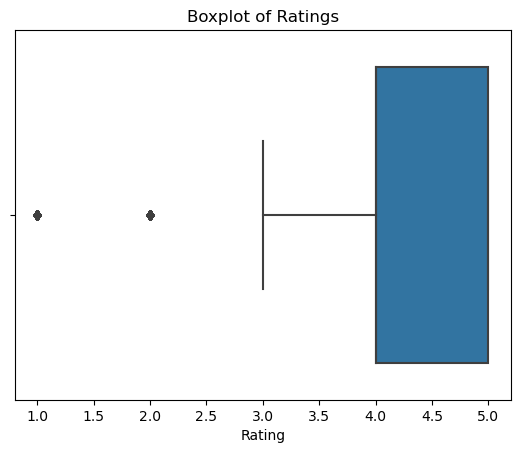

In [39]:
#outlier detection
# Boxplot for Ratings
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=data['Rating'])
plt.title('Boxplot of Ratings')
plt.show()


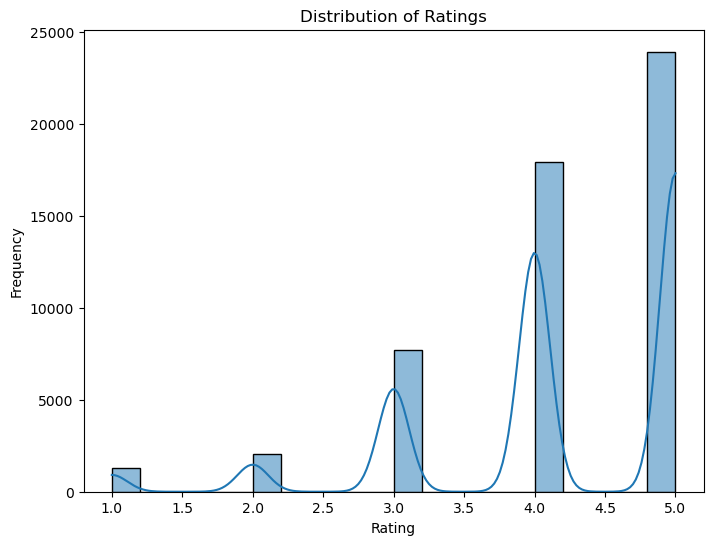

In [40]:
#EDA for ratings(Regression problem)
#distribution of ratings 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(data['Rating'], kde=True, bins=20)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [41]:
from scipy.stats import skew, kurtosis

print('Skewness of Rating:', skew(data['Rating']))
print('Kurtosis of Rating:', kurtosis(data['Rating']))


Skewness of Rating: -1.1985598501393573
Kurtosis of Rating: 1.167185062799506


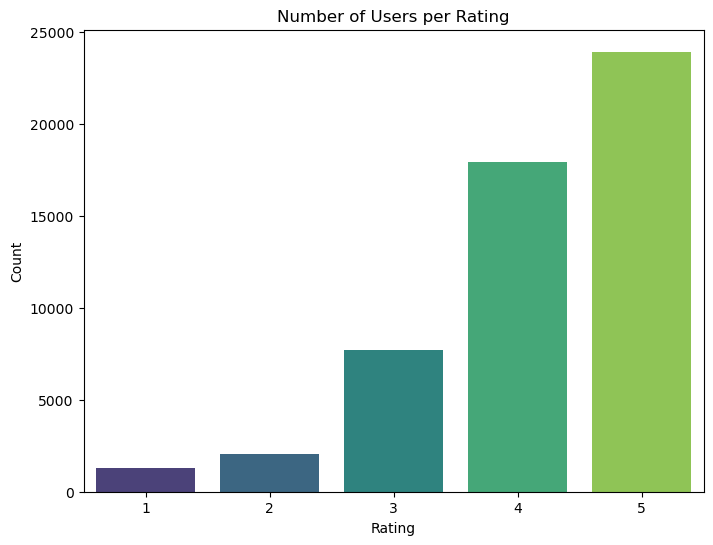

In [42]:
#bar plot for the distribution of ratings
rating_counts = data['Rating'].value_counts().sort_index()

plt.figure(figsize=(8,6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Number of Users per Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


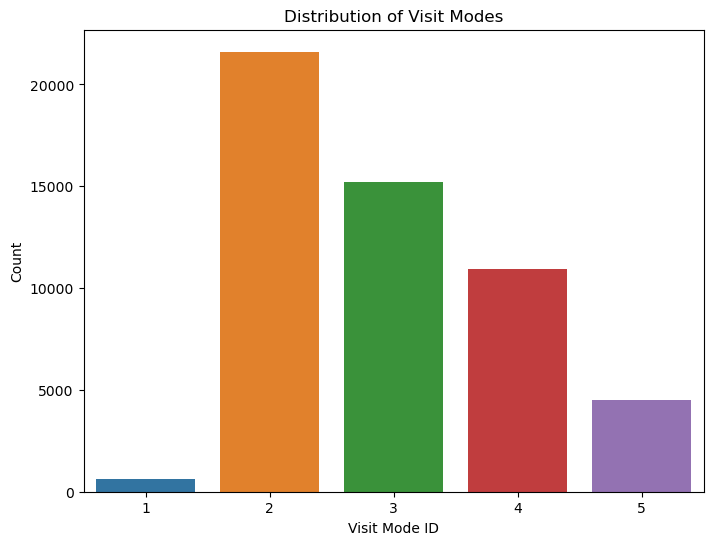

In [43]:
#EDA for visitmodeID (Classification)
plt.figure(figsize=(8,6))
sns.countplot(x='VisitModeId', data=data)
plt.title('Distribution of Visit Modes')
plt.xlabel('Visit Mode ID')
plt.ylabel('Count')
plt.show()


In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
X = data[['VisitYear', 'VisitMonth', 'AttractionTypeId', 'ContenentId', 'RegionId', 'CountryId', 'CityId']]
y = data['Rating']

# Split into train-test (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Step 3: Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Step 5: Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

# Step 6: Evaluation
print("Random Forest Regressor Results:")
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.4f}")

print("\nGradient Boosting Regressor Results:")
print(f"R2 Score: {r2_score(y_test, y_pred_gb):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gb)):.4f}")

Random Forest Regressor Results:
R2 Score: -0.0024
RMSE: 0.9696

Gradient Boosting Regressor Results:
R2 Score: 0.0803
RMSE: 0.9287


count    52898.000000
mean         4.157889
std          0.970551
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64


<Axes: xlabel='Rating', ylabel='Count'>

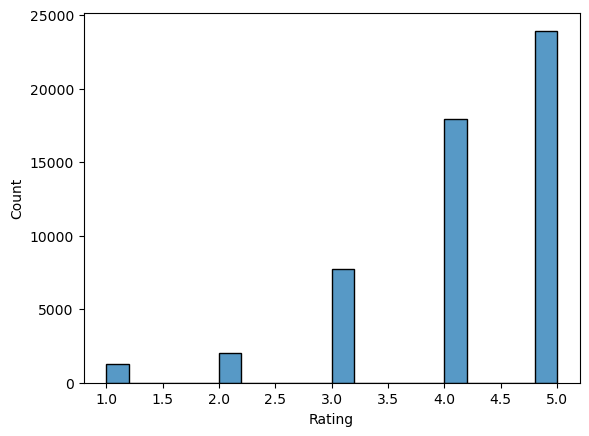

In [47]:
print(data['Rating'].describe())
sns.histplot(data['Rating'], bins=20)

In [48]:
data = merged_df[['VisitYear', 'VisitMonth', 'Rating', 'AttractionTypeId', 'VisitModeId', 'ContenentId', 'RegionId', 'CityId', 'CountryId']].copy()

In [49]:
#2. Classification problem
x = data[['VisitYear', 'VisitMonth', 'Rating', 'AttractionTypeId', 'ContenentId', 'RegionId', 'CityId', 'CountryId']]
y = data['VisitModeId']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Convert year/month to datetime features
x['VisitDate'] = pd.to_datetime(x['VisitYear'].astype(str) + '-' + x['VisitMonth'].astype(str))
x['DayOfWeek'] = x['VisitDate'].dt.dayofweek
x['Season'] = (x['VisitMonth'] % 12 + 3) // 3  # 1=Winter, 2=Spring, etc.
x.drop(['VisitDate', 'VisitYear', 'VisitMonth'], axis=1, inplace=True)

# Define numeric and categorical features
numeric_features = ['Rating']
categorical_features = ['AttractionTypeId', 'ContenentId', 'RegionId', 'CityId', 'CountryId', 'DayOfWeek', 'Season']

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52898 entries, 0 to 52929
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   VisitYear         52898 non-null  int64
 1   VisitMonth        52898 non-null  int64
 2   Rating            52898 non-null  int64
 3   AttractionTypeId  52898 non-null  int64
 4   VisitModeId       52898 non-null  int64
 5   ContenentId       52898 non-null  int64
 6   RegionId          52898 non-null  int64
 7   CityId            52898 non-null  int64
 8   CountryId         52898 non-null  int64
dtypes: int64(9)
memory usage: 4.0 MB


Classification Report:

              precision    recall  f1-score   support

           1       0.04      0.52      0.08       125
           2       0.52      0.51      0.51      4321
           3       0.50      0.34      0.40      3042
           4       0.32      0.13      0.18      2188
           5       0.15      0.31      0.20       904

    accuracy                           0.36     10580
   macro avg       0.31      0.36      0.28     10580
weighted avg       0.43      0.36      0.38     10580



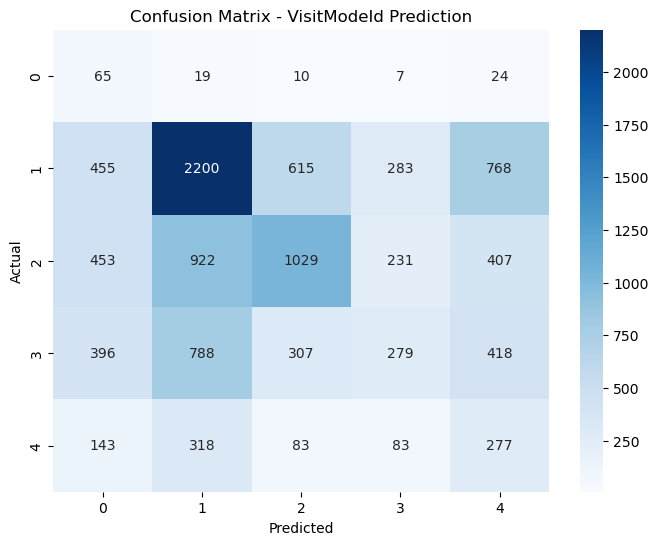

In [53]:
# Step 1: Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Split data into train-test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Step 4: Predict
y_pred = clf.predict(X_test)

# Step 5: Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - VisitModeId Prediction')
plt.show()


Classification Report After SMOTE:

              precision    recall  f1-score   support

           1       0.04      0.59      0.07       125
           2       0.52      0.47      0.49      4321
           3       0.51      0.31      0.39      3042
           4       0.31      0.11      0.17      2188
           5       0.13      0.27      0.18       904

    accuracy                           0.34     10580
   macro avg       0.30      0.35      0.26     10580
weighted avg       0.43      0.34      0.36     10580



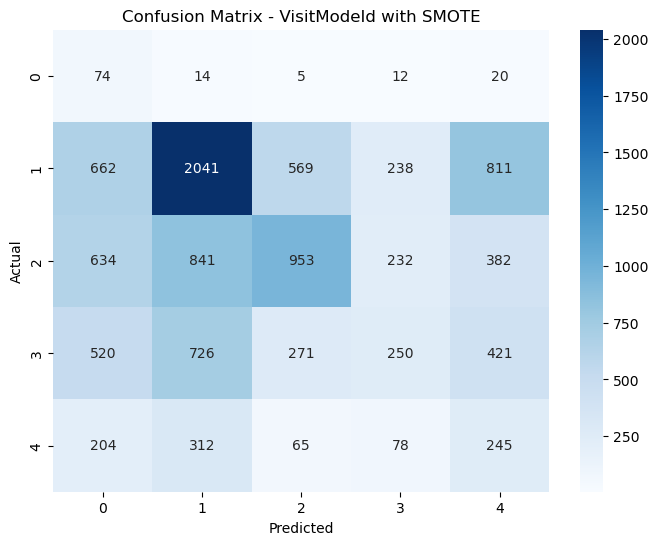

In [54]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Train-Test Split (stratify = True is great)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Step 2: Apply SMOTE to balance the training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Step 3: Train classifier on balanced data
clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
clf.fit(X_train_res, y_train_res)

# Step 4: Predict
y_pred = clf.predict(X_test)

# Step 5: Evaluate
print("Classification Report After SMOTE:\n")
print(classification_report(y_test, y_pred))

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - VisitModeId with SMOTE')
plt.show()


In [55]:
!pip install scikit-surprise


  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-surprise


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [155 lines of output]
  C:\Users\K L narasaiah\AppData\Local\Temp\pip-build-env-uu8qpv0q\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
  !!
  
          ********************************************************************************
          Please use a simple string containing a SPDX expression for `project.license`. You can also use `project.license-files`. (Both options available on setuptools>=77.0.0).
  
          By 2026-Feb-18, you need to update your project and remove deprecated calls
          or your builds will no longer be supported.
  
          See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
          ********************************************************************************
  
  !!
    corresp(dist, value, root_dir)
  C:\Users\K L narasaiah\AppData\Loca

In [56]:
data = merged_df[['VisitYear', 'UserId', 'VisitMonth', 'Rating', 'AttractionId', 'VisitModeId', 'ContenentId', 'RegionId', 'CityId', 'CountryId']].copy()

In [67]:
#collaborative filtering method for the tourist recommendation

import pandas as pd
import numpy as np
from collections import defaultdict

# Filter necessary data
df = data[['UserId', 'AttractionId', 'Rating']]

# Create user-to-attraction rating map
user_ratings = defaultdict(dict)
for row in df.itertuples():
    user_ratings[row.UserId][row.AttractionId] = row.Rating

def cosine_sim(user1, user2):
    u1 = user_ratings[user1]
    u2 = user_ratings[user2]
    common = set(u1).intersection(u2)
    if not common:
        return 0
    v1 = np.array([u1[i] for i in common])
    v2 = np.array([u2[i] for i in common])
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

def recommend(user_id, top_n_users=10, top_k_items=5):
    if user_id not in user_ratings:
        return pd.Series(dtype=float)
    sims = [(u, cosine_sim(user_id, u)) for u in user_ratings if u != user_id]
    sims = sorted(sims, key=lambda x: x[1], reverse=True)[:top_n_users]
    scores = defaultdict(float)
    user_items = set(user_ratings[user_id])
    for other_user, sim in sims:
        for item, rating in user_ratings[other_user].items():
            if item not in user_items:
                scores[item] += sim * rating
    ranked = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_k_items]
    return pd.Series({item: score for item, score in ranked})

# Example use
print("Top recommended attractions for user 70456:")
print(recommend(70456))

# Example use
print("Top recommended attractions for user 7567:")
print(recommend(7567))

Top recommended attractions for user 70456:
748    10.0
749     9.0
841     5.0
650     5.0
737     5.0
dtype: float64
Top recommended attractions for user 7567:
748    10.0
749     9.0
841     5.0
650     5.0
737     5.0
dtype: float64
